# Chapter 3 금융데이터 수집3 _FRED

## 1. FRED 홈페이지 사용법

https://en.wikipedia.org/wiki/Federal_Reserve_Economic_Data

https://fred.stlouisfed.org

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

https://fred.stlouisfed.org/series/GDP


## 2. pandas_datareader로 FRED 데이터 불러오기

### (1) 미국 GDP(GDP)

In [1]:
import pandas_datareader as pdr

data1 = pdr.DataReader('GDP', 'fred', '2000-01-01')
data1.head()

,GDP
DATE,
2000-01-01,10002.179
2000-04-01,10247.720
2000-07-01,10318.165
2000-10-01,10435.744
2001-01-01,10470.231


### (2) 미국 장단기 금리차

In [2]:
import pandas_datareader as pdr

data2 = pdr.DataReader('T10Y2Y', 'fred', '2000-01-01')
data2.head(10)

,T10Y2Y
DATE,
2000-01-03,0.20
2000-01-04,0.19
2000-01-05,0.24
2000-01-06,0.22
2000-01-07,0.21
2000-01-10,0.19
2000-01-11,0.22
2000-01-12,0.23
2000-01-13,0.23


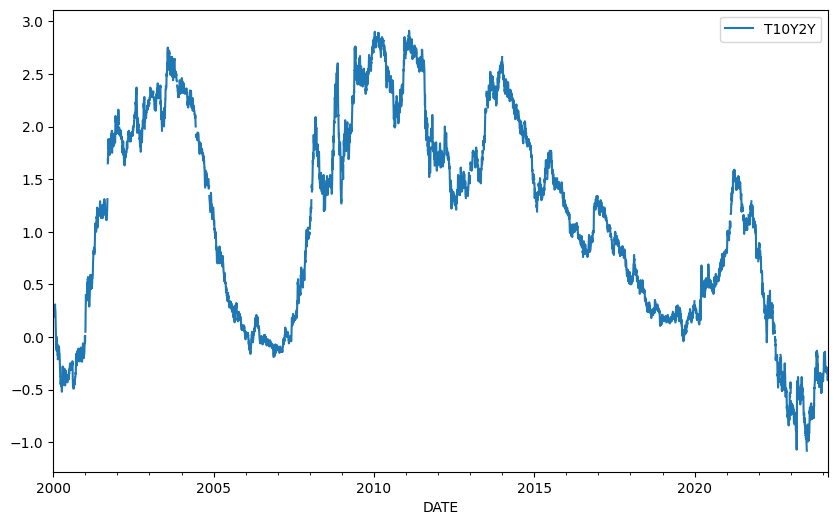

In [3]:
import matplotlib.pyplot as plt
data2.plot(figsize=(10, 6))
plt.show()

### (3) datetime 라이브러리를 이용한 데이터 불러오기

In [4]:
import pandas_datareader as pdr
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 5, 1)
gdp = pdr.DataReader('GDP', 'fred', start, end)
gdp

,GDP
DATE,
2020-01-01,21706.513
2020-04-01,19913.143
2020-07-01,21647.640
2020-10-01,22024.502
2021-01-01,22600.185
2021-04-01,23292.362
2021-07-01,23828.973
2021-10-01,24654.603
2022-01-01,25029.116


In [5]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2020-01-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     14 non-null     float64
dtypes: float64(1)
memory usage: 224.0 bytes


### (4) GDP 기초통계량 확인

In [6]:
gdp.describe()

,GDP
count,14.000000
mean,24037.211929
std,2232.944360
min,19913.143000
25%,22168.422750
50%,24241.788000
75%,25882.047500
max,27063.012000


In [7]:
gdp.loc['2021-01-01']

GDP    22600.185
Name: 2021-01-01 00:00:00, dtype: float64

### (5) 여러국가 데이터 불러오기

In [8]:
from pandas_datareader import wb
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2015, end=2021)
dat

NY.GDP.PCAP.KD
country       year                
Canada        2021    44375.127188
              2020    42390.063098
              2019    45120.999763
              2018    44916.474157
              2017    44339.193332
              2016    43552.929818
              2015    43596.135537
Mexico        2021     9760.445299
              2020     9273.811000
              2019    10226.231333
              2018    10343.353429
              2017    10240.310425
              2016    10161.355707
              2015    10098.173181
United States 2021    61829.845627
              2020    58451.606715
              2019    60698.011299
              2018    59607.393660
              2017    58207.578310
              2016    57292.538783
              2015    56762.729452

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21 entries, ('Canada', '2021') to ('United States', '2015')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.PCAP.KD  21 non-null     float64
dtypes: float64(1)
memory usage: 807.0+ bytes


### (6) 인플레이션 데이터 불러오기

In [10]:
inflation = pdr.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.tail()

,CPIAUCSL,CPILFESL
DATE,,
2023-01-01,300.356,302.709
2023-02-01,301.509,304.124
2023-03-01,301.744,305.112
2023-04-01,303.032,306.539
2023-05-01,303.365,307.646


### (7) wb을 이용한 특정 단어 포함 데이터 불러오기

In [11]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10972,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10974,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10976,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10977,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


## 3. FRED에서 API 경제데이터 가져오기

### (1) 데이터를 가져오기 앞서 FRED에서 APIKEY 받기

https://fred.stlouisfed.org/

### (2) 필요한 라이브러리 설치하기

In [12]:
import requests
import json
data = requests.get('https://api.stlouisfed.org/fred/series?series_id=GNPCA&api_key=43be4fc471782325cab7d47238bf8962&file_type=json')

In [13]:
data.json()

{'realtime_start': '2024-03-04',
 'realtime_end': '2024-03-04',
 'seriess': [{'id': 'GNPCA',
   'realtime_start': '2024-03-04',
   'realtime_end': '2024-03-04',
   'title': 'Real Gross National Product',
   'observation_start': '1929-01-01',
   'observation_end': '2022-01-01',
   'frequency': 'Annual',
   'frequency_short': 'A',
   'units': 'Billions of Chained 2017 Dollars',
   'units_short': 'Bil. of Chn. 2017 $',
   'seasonal_adjustment': 'Not Seasonally Adjusted',
   'seasonal_adjustment_short': 'NSA',
   'last_updated': '2023-09-28 07:51:16-05',
   'popularity': 15,
   'notes': 'BEA Account Code: A001RX\n\n'}]}

In [14]:
!pip install datapungi_fed


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
!pytest

============================= test session starts =============================
platform win32 -- Python 3.11.4, pytest-8.1.0, pluggy-1.4.0
rootdir: C:\apps\finance_data\파이썬 파일 모음
plugins: html-4.1.1, metadata-3.1.1
collected 0 items

============================ no tests ran in 0.01s ============================


In [16]:
!pip install fredapi


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### (3) 데이터 가져오기

#### 1) 라이브러리 불러오기

In [17]:
from fredapi import Fred
fred = Fred(api_key='fd1643976833c89506544ff62efd7f70')

#### 2) GDP 가져오기

In [18]:
data = fred.get_series('GDP')
data

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2022-10-01    26408.405
2023-01-01    26813.601
2023-04-01    27063.012
2023-07-01    27610.128
2023-10-01    27944.627
Length: 312, dtype: float64

#### 3) 10년 금리 데이터 가져오기

In [19]:
df = fred.get_series('GS10')
df

1953-04-01    2.83
1953-05-01    3.05
1953-06-01    3.11
1953-07-01    2.93
1953-08-01    2.95
              ... 
2023-10-01    4.80
2023-11-01    4.50
2023-12-01    4.02
2024-01-01    4.06
2024-02-01    4.21
Length: 851, dtype: float64

#### 4) 장단기 금리차 데이터 가져오기

In [20]:
df = fred.get_series('T10Y2Y')
df

1976-06-01    0.68
1976-06-02    0.71
1976-06-03    0.70
1976-06-04    0.77
1976-06-07    0.79
              ... 
2024-02-27   -0.39
2024-02-28   -0.37
2024-02-29   -0.39
2024-03-01   -0.35
2024-03-04   -0.39
Length: 12460, dtype: float64

#### 5) 특정 시점을 설정에서 데이터 가져오기

In [21]:
df = fred.get_series_first_release('GDP')
df

date
1946-01-01        199.7
1946-04-01        207.7
1946-07-01        217.9
1946-10-01        222.2
1947-01-01        226.7
                ...    
2022-10-01    26132.458
2023-01-01    26465.865
2023-04-01    26834.953
2023-07-01    27623.543
2023-10-01    27938.831
Name: value, Length: 312, dtype: object

In [22]:
df = fred.get_series_latest_release('GDP')
df

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2022-10-01    26408.405
2023-01-01    26813.601
2023-04-01    27063.012
2023-07-01    27610.128
2023-10-01    27944.627
Length: 312, dtype: float64

In [23]:
fred.get_series_as_of_date('GDP', '6/1/2019')

,realtime_start,date,value
0,1992-12-22 00:00:00,1946-01-01 00:00:00,199.7
1,1996-01-19 00:00:00,1946-01-01 00:00:00,NaT
2,1997-05-07 00:00:00,1946-01-01 00:00:00,210.4
3,1999-10-28 00:00:00,1946-01-01 00:00:00,NaT
4,1992-12-22 00:00:00,1946-04-01 00:00:00,207.7
...,...,...,...
3053,2018-12-21 00:00:00,2018-07-01 00:00:00,20658.204
3059,2019-02-28 00:00:00,2018-10-01 00:00:00,20891.367
3060,2019-03-28 00:00:00,2018-10-01 00:00:00,20865.14
3066,2019-04-26 00:00:00,2019-01-01 00:00:00,21062.691


In [24]:
df = fred.get_series_all_releases('GDP')
df

,realtime_start,date,value
0,1992-12-22 00:00:00,1946-01-01 00:00:00,199.7
1,1996-01-19 00:00:00,1946-01-01 00:00:00,NaT
2,1997-05-07 00:00:00,1946-01-01 00:00:00,210.4
3,1999-10-28 00:00:00,1946-01-01 00:00:00,NaT
4,1992-12-22 00:00:00,1946-04-01 00:00:00,207.7
...,...,...,...
3165,2023-10-26 00:00:00,2023-07-01 00:00:00,27623.543
3166,2023-11-29 00:00:00,2023-07-01 00:00:00,27644.463
3167,2023-12-21 00:00:00,2023-07-01 00:00:00,27610.128
3168,2024-01-25 00:00:00,2023-10-01 00:00:00,27938.831
